In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\rajesh kumar\Documents\webScraper\redditIndia_scrapedData_srk.csv',encoding = 'utf-8')
df.shape

(1000, 6)

In [2]:
df.isnull().sum()

title            0
description    432
id               0
url              0
author           0
flair           33
dtype: int64

In [3]:
df=df.fillna("missing")
df.reset_index(inplace=True,drop=True)

In [4]:
df=df[df["flair"]!="missing"]
df.replace(to_replace="Science & Technology",value="Science/Technology",inplace=True)

In [5]:
"""Some Flairs are removed if their count is less than a threshold so that the data is not very uneven."""
arr=df.flair.unique()
for x in arr:
    if((df[df.flair==x].count()<70).all()):
        df=df[df.flair!=x]
        
df.flair.value_counts()

Non-Political     176
Politics          174
AskIndia          170
Coronavirus       142
Scheduled          76
Policy/Economy     73
Name: flair, dtype: int64

In [6]:
df.reset_index(inplace=True,drop=True)
df.shape

(811, 6)

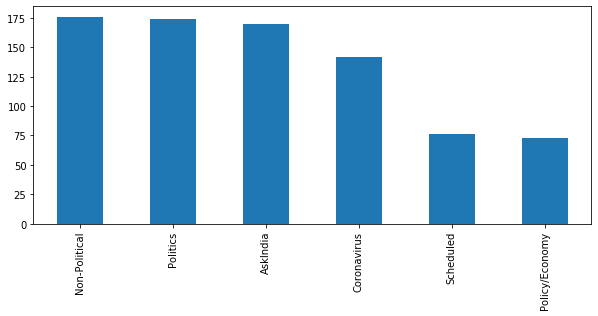

In [7]:
"""Plot to show how the training data is distributed"""
import spacy
import nltk
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
df["flair"].value_counts().plot(kind='bar');

In [8]:
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def remove_html(input_text):
    """Remove html tags and text from the input text
    Parameters:
    input_text (String): input text
    
    Returns:
    String: text with html tags removed
    """
    soup = BeautifulSoup(input_text, "html.parser")
    text=soup.get_text()
    
    """Remove the brackets and elements in them"""
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    newtext=re.sub('<.*?>', '', text)
    newtext=re.sub('\[[^]]*\]', '', newtext)
    return newtext

def normalize(words):
    """For Text Normalization
    
    Parameters:
    words list: list of tokenized words
    
    Returns:
    List: processed list after normalization
    """
    
    """Remove the non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    words=new_words
    
    """Change all words into lowercase"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    words=new_words
        
    """Remove punctuation marks"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    words=new_words
            
    """Remove numbers"""
    new_words = []
    for word in words:
        if (word.isdigit()==False):
            new_words.append(word)
    words=new_words
    
    """Remove stop words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    words=new_words
    
    return words

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words
    
    Parameters:
    words list: list of normalized words
    
    Returns:
    List: processed list after lemmatization
    """
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def perform(txt):
    txt=remove_html(txt)
    words = nltk.word_tokenize(txt)
    words = normalize(words)
    words=lemmatize_verbs(words)
    ans=' '.join(map(str, words))
    return ans

i=0
for row in df["title"]:
    row=perform(row)
    df.loc[i]["title"]=row
    i+=1

i=0
for row in df["description"]:
    row=perform(row)
    df.loc[i]["description"]=row
    i+=1


In [9]:
df["both"]=df["title"]+df["description"]
df

,title,description,id,url,author,flair,both
0,world spot hindutva bigotry modi insist corona...,miss,g5gjbc,https://scroll.in/article/959749/now-that-the-...,hauntin,Coronavirus,world spot hindutva bigotry modi insist corona...
1,employees television channel test positive cor...,miss,g5avi6,https://twitter.com/TimesNow/status/1252496148...,Fabulous-Rice,Coronavirus,employees television channel test positive cor...
2,coronavirus staff members pune hospital test p...,miss,g5fl60,https://scroll.in/latest/959818/coronavirus-25...,DenseSpirit5,Coronavirus,coronavirus staff members pune hospital test p...
3,first coronavirus patient receive plasma thera...,miss,g5dp3e,https://www.firstpost.com/health/first-coronav...,pammoth,Coronavirus,first coronavirus patient receive plasma thera...
4,hard lockdown may reduce india coronavirus cas...,miss,g5ayre,https://qz.com/india/1842004/continued-lockdow...,i_Killed_Reddit,Coronavirus,hard lockdown may reduce india coronavirus cas...
...,...,...,...,...,...,...,...
806,migrants walk back home stay run food,miss,fs6vcg,https://amp.scroll.in/article/957735/these-mig...,hipporama,Coronavirus,migrants walk back home stay run foodmiss
807,coronavirus outbreak google india launch featu...,miss,g0snn7,https://www.firstpost.com/tech/news-analysis/c...,krishividya,Coronavirus,coronavirus outbreak google india launch featu...
808,best cat wet food available india,hi look best cat wet food get india apart whis...,fl0c32,https://www.reddit.com/r/india/comments/fl0c32...,isthislifereal-,AskIndia,best cat wet food available indiahi look best ...
809,lockdown rumour food get delhi school cause st...,miss,g49nu1,https://www.youtube.com/watch?v=oFiUd3oulgw,boomshakal2017,Coronavirus,lockdown rumour food get delhi school cause st...


In [10]:
df.to_csv(r"C:\Users\rajesh kumar\Documents\webScraper\analysedData.csv")

In [11]:
from collections import defaultdict
sent1 = [row.split() for row in df['description']]
sent2=[row.split() for row in df['title']]
sent1.extend(sent2)
sentences=sent1
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

11964

In [12]:
import multiprocessing
from gensim.models import Word2Vec
from time import time
import logging
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [13]:
"""Creating a word2Vec model of the words from the titla and description of the posts"""
cpu_cores = multiprocessing.cpu_count()
word2vec_model = Word2Vec(min_count=10,window=5,size=300,sample=6e-5,alpha=0.03,min_alpha=0.0007, negative=20,workers=cpu_cores-1)

In [14]:
t = time()
word2vec_model.build_vocab(sentences, progress_per=10000)
print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 13:25:15: collecting all words and their counts
INFO - 13:25:15: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 13:25:16: collected 11964 word types from a corpus of 85403 raw words and 1622 sentences
INFO - 13:25:16: Loading a fresh vocabulary
INFO - 13:25:16: effective_min_count=10 retains 1664 unique words (13% of original 11964, drops 10300)
INFO - 13:25:16: effective_min_count=10 leaves 62325 word corpus (72% of original 85403, drops 23078)
INFO - 13:25:16: deleting the raw counts dictionary of 11964 items
INFO - 13:25:16: sample=6e-05 downsamples 1664 most-common words
INFO - 13:25:16: downsampling leaves estimated 23835 word corpus (38.2% of prior 62325)
INFO - 13:25:16: estimated required memory for 1664 words and 300 dimensions: 4825600 bytes
INFO - 13:25:16: resetting layer weights


Time to build vocab: 0.01 mins


In [15]:
"""
Stores vocabulary built by word2vec in words.
"""
words = list(word2vec_model.wv.vocab)
print(words)

['miss', 'april', 'number', 'around', 'https', 'dont', 'seem', 'decrease', 'increase', 'concern', 'right', 'lockdown', 'spread', 'plan', 'open', 'even', 'start', 'trend', 'also', 'really', 'less', 'test', 'catch', 'capacity', 'would', 'end', 'people', 'virus', 'give', 'keep', 'happen', 'sometimes', 'situation', 'quite', 'thank', 'everyone', 'work', 'safe', 'incident', 'occur', 'three', 'identify', 'reach', 'tell', 'one', 'show', 'hand', 'threaten', 'claim', 'muslims', 'coronavirus', 'disease', 'say', 'india', 'uae', 'share', 'value', 'ground', 'indian', 'country', 'tweet', 'amid', 'grow', 'arab', 'world', 'report', 'target', 'pandemic', 'discrimination', 'rule', 'law', 'always', 'remember', 'quote', 'prime', 'minister', 'narendra', 'modi', 'covid19', 'see', 'race', 'religion', 'caste', 'language', 'border', 'strike', 'response', 'conduct', 'together', 'ref_srctwsrc', '5etfw', 'come', 'countries', 'include', 'crisis', 'independent', 'human', 'commission', 'organization', 'muslim', 'nati

In [17]:
t = time()
word2vec_model.train(sentences, total_examples=word2vec_model.corpus_count, epochs=30, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 13:25:44: training model with 3 workers on 1664 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=5
INFO - 13:25:44: worker thread finished; awaiting finish of 2 more threads
INFO - 13:25:44: worker thread finished; awaiting finish of 1 more threads
INFO - 13:25:44: worker thread finished; awaiting finish of 0 more threads
INFO - 13:25:44: EPOCH - 1 : training on 85403 raw words (23784 effective words) took 0.3s, 76891 effective words/s
INFO - 13:25:44: worker thread finished; awaiting finish of 2 more threads
INFO - 13:25:44: worker thread finished; awaiting finish of 1 more threads
INFO - 13:25:44: worker thread finished; awaiting finish of 0 more threads
INFO - 13:25:44: EPOCH - 2 : training on 85403 raw words (23981 effective words) took 0.1s, 201475 effective words/s
INFO - 13:25:44: worker thread finished; awaiting finish of 2 more threads
INFO - 13:25:44: worker thread finished; awaiting finish of 1 more threads
INFO - 13:25:44: worker thread fi

INFO - 13:25:47: EPOCH - 24 : training on 85403 raw words (23825 effective words) took 0.1s, 198309 effective words/s
INFO - 13:25:47: worker thread finished; awaiting finish of 2 more threads
INFO - 13:25:47: worker thread finished; awaiting finish of 1 more threads
INFO - 13:25:47: worker thread finished; awaiting finish of 0 more threads
INFO - 13:25:47: EPOCH - 25 : training on 85403 raw words (24187 effective words) took 0.1s, 201555 effective words/s
INFO - 13:25:47: worker thread finished; awaiting finish of 2 more threads
INFO - 13:25:47: worker thread finished; awaiting finish of 1 more threads
INFO - 13:25:47: worker thread finished; awaiting finish of 0 more threads
INFO - 13:25:47: EPOCH - 26 : training on 85403 raw words (23616 effective words) took 0.1s, 192562 effective words/s
INFO - 13:25:48: worker thread finished; awaiting finish of 2 more threads
INFO - 13:25:48: worker thread finished; awaiting finish of 1 more threads
INFO - 13:25:48: worker thread finished; await

Time to train the model: 0.07 mins


In [18]:
word2vec_model.init_sims(replace=True)

INFO - 13:25:51: precomputing L2-norms of word weight vectors


In [19]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

C:\anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  


coronavirus


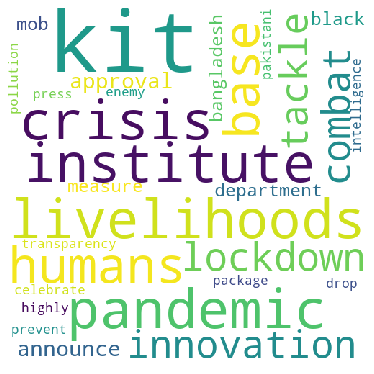

politics


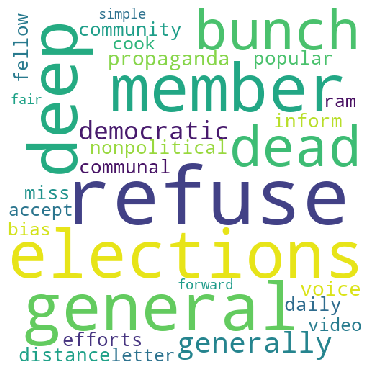

nonpolitical


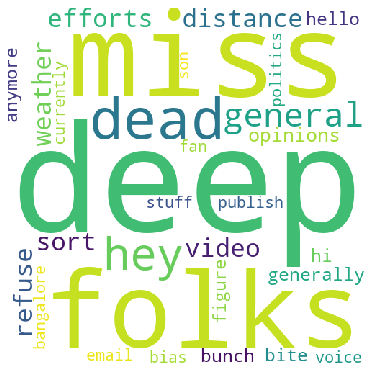

askindia


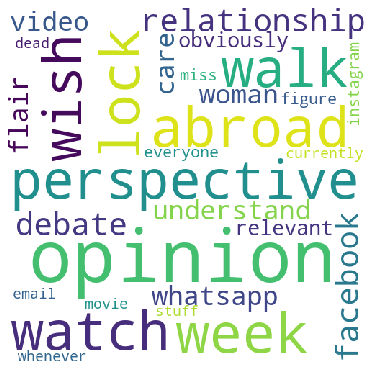

policy


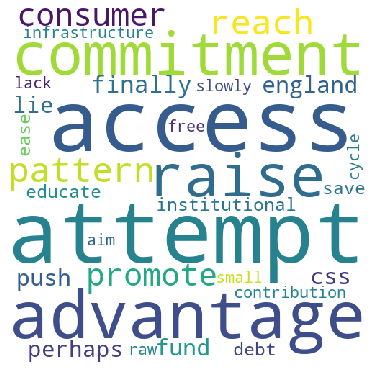

economy


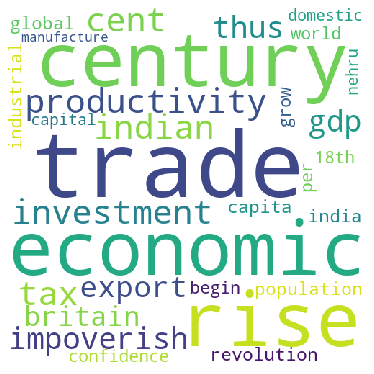

schedule


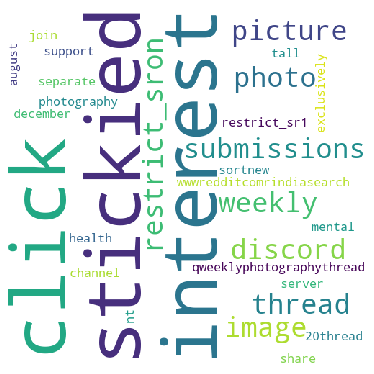

In [20]:
"""
Wordclouds display the words according to their frequency.
For different flairs I have made wordclouds which shows the 30 most similar words related to the word. 
"""
stopwords = set(STOPWORDS) 
all_flairs=df.flair.unique()
all_flairs=np.append(all_flairs,['policy','economy','schedule'])
for flair in all_flairs:
    flair=re.sub(r'[^\w\s]', '', flair).lower()
    if flair in word2vec_model:
        print(flair)
        similar=word2vec_model.wv.most_similar(positive=[flair.lower()],topn=30)
        words_cloud=""
        for s in similar:
            words_cloud+=s[0]+" "
        wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(words_cloud)
        plt.figure(figsize = (5, 5), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.show() 